In [1]:
!pip3 install qiskit
!pip3 install pylatexenc

In [45]:
from qiskit import *
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import rv_continuous

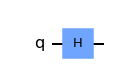

In [3]:
circ = QuantumCircuit(1);
circ.h(0);
circ.draw('mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')

In [63]:
def Haar(F,N):
    if F<0 or F>1:
        return 0;
    return (N-1)*(1-F)**(N-2);
class Haar_dist(rv_continuous):
    def _pdf(self,x):
        return Harr(x,1*2);

In [90]:
def kl_divergence(p, q):
    return np.mean(p*np.log(p/q));
    #return np.sum(np.where(p != 0, p * np.log(p / q), 0))

array([7.43359757e-07, 7.45220389e-07, 7.47085490e-07, ...,
       7.48955072e-07, 7.47085490e-07, 7.45220389e-07])

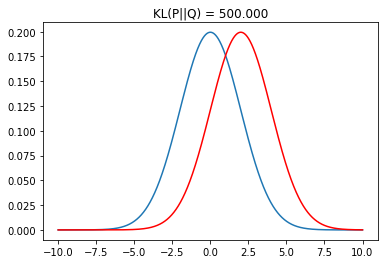

In [76]:
"""
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')
p
"""


In [34]:
def PQC(th):
    backend = Aer.get_backend('statevector_simulator');
    circ = QuantumCircuit(1);
    circ.h(0);
    circ.rz(th,0);
    circ.draw('mpl')
    result = execute(circ,backend).result() # Do the simulation, returning the result
    out_state = result.get_statevector();
    return np.asmatrix(out_state).T

In [84]:
len = 1000;
arr = [];
for i in range(len):
    t1 = np.random.uniform(0,2*np.pi);
    t2 = np.random.uniform(0,2*np.pi);
    fid = np.abs(PQC(t1).getH()*PQC(t2))**2;
    arr.append(fid[0,0]);
print(arr)

117599929063, 0.7247087701900209, 0.002044031647484842, 0.8900250834087027, 0.05169935138851498, 0.3875464562344582, 0.004977654635479702, 0.04999489426852631, 0.30511386671417257, 0.9270488550040279, 0.15983507505906328, 0.9990991242525861, 0.08469609786535014, 0.19746377529762651, 0.3420142521159397, 0.1289978718896524, 0.5340464669602389, 0.32118606304111535, 0.7330272746262035, 0.962755559274255, 0.024165538026066902, 0.6771380182853041, 0.40759994618683987, 0.7752115692940196, 0.25138441364556435, 0.9925124340112909, 0.8057368392395096, 0.6162943197698356, 0.15645040731944648, 0.1970455631282406, 0.5523689394228628, 0.5945817561370721, 0.7819264093948121, 0.4605217205123028, 0.12668939749268993, 0.07867411489629951, 0.8159032861278819, 0.2926690673222201, 0.6463196629845019, 0.2699436861236852, 0.5021456227637889, 0.06833886846216052, 0.5005197249568134, 0.5362287483779313, 0.3360734814710726, 0.06431781193843089, 0.13461962655887988, 0.1163945726062378, 0.2625782129717133, 0.6904

In [85]:
haar = [];
h = Haar_dist(a=0,b=1,name="haar");
for i in range(len):   
    haar.append(h.rvs())

print(haar)

70088465, 0.4474749863279408, 0.32952212249081814, 0.7090524666699175, 0.33259321584378043, 0.315037575814867, 0.48094101784104304, 0.5686284882807892, 0.7707524339367587, 0.172192343247075, 0.8368899523811513, 0.7458161251325195, 0.17944514266961442, 0.4333649170660199, 0.2693410524981027, 0.28783034528883844, 0.26157591070331, 0.3339789368299442, 0.9960274043881601, 0.7257239505396652, 0.3932821099917231, 0.6969293274854049, 0.733803597934698, 0.585879121111673, 0.18128491740917896, 0.23820449469134275, 0.048528242205597594, 0.9451164464750116, 0.5672019779112115, 0.22320887680873014, 0.13116861768202515, 0.08510166457973567, 0.9145341084931727, 0.767383829793608, 0.9500823654772464, 0.5444619906948245, 0.09849984470797712, 0.07183215059380721, 0.8623596240025414, 0.9913513543142967, 0.6380028637770155, 0.4412383441114903, 0.6671451527267659, 0.7091906426024084, 0.5266526422669568, 0.6431772779902438, 0.8427085690655008, 0.22168046701025568, 0.0032434761462745154, 0.7351881380673418,

(array([24., 20.,  8., 21., 21., 14., 18., 16., 31., 14., 23., 18., 21.,
        27., 13., 29., 17., 12., 25., 27., 22., 23., 21., 13., 21., 12.,
        22., 23., 22., 18., 20., 26., 23., 22., 27., 14., 22., 16., 26.,
        19., 17., 22., 26., 17.,  9., 15., 21., 22., 23., 17.]),
 array([3.31118122e-04, 2.03040001e-02, 4.02768821e-02, 6.02497641e-02,
        8.02226461e-02, 1.00195528e-01, 1.20168410e-01, 1.40141292e-01,
        1.60114174e-01, 1.80087056e-01, 2.00059938e-01, 2.20032820e-01,
        2.40005702e-01, 2.59978584e-01, 2.79951466e-01, 2.99924348e-01,
        3.19897230e-01, 3.39870112e-01, 3.59842994e-01, 3.79815876e-01,
        3.99788758e-01, 4.19761640e-01, 4.39734522e-01, 4.59707404e-01,
        4.79680286e-01, 4.99653168e-01, 5.19626050e-01, 5.39598932e-01,
        5.59571814e-01, 5.79544696e-01, 5.99517578e-01, 6.19490460e-01,
        6.39463342e-01, 6.59436224e-01, 6.79409106e-01, 6.99381988e-01,
        7.19354870e-01, 7.39327752e-01, 7.59300634e-01, 7.79273516e-

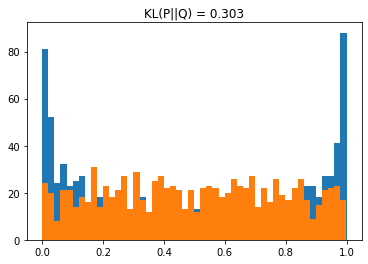

In [91]:
plt.title('KL(P||Q) = %1.3f' % kl_divergence(np.array(arr), np.array(haar)))
n_bins = 50;
# We can set the number of bins with the `bins` kwarg
plt.hist(np.array(arr), bins=n_bins)
plt.hist(np.array(haar), bins=n_bins)